In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')

In [4]:
df.head()

Release_Date                    Title  \
0   2021-12-15  Spider-Man: No Way Home   
1   2022-03-01               The Batman   
2   2022-02-25                  No Exit   
3   2021-11-24                  Encanto   
4   2021-12-22           The King's Man   

                                            Overview  Popularity  Vote_Count  \
0  Peter Parker is unmasked and no longer able to...    5083.954        8940   
1  In his second year of fighting crime, Batman u...    3827.658        1151   
2  Stranded at a rest stop in the mountains durin...    2618.087         122   
3  The tale of an extraordinary family, the Madri...    2402.201        5076   
4  As a collection of history's worst tyrants and...    1895.511        1793   

   Vote_Average Original_Language                               Genre  \
0           8.3                en  Action, Adventure, Science Fiction   
1           8.1                en            Crime, Mystery, Thriller   
2           6.3                en                            Thriller   
3           7.7                en  Animation, Comedy, Family, Fantasy   
4           7.0                en    Action, Adventure, Thriller, War   

                                          Poster_Url  
0  https://image.tmdb.org/t/p/original/1g0dhYtq4i...  
1  https://image.tmdb.org/t/p/original/74xTEgt7R3...  
2  https://image.tmdb.org/t/p/original/vDHsLnOWKl...  
3  https://image.tmdb.org/t/p/original/4j0PNHkMr5...  
4  https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...

In [5]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtype)

datetime64[ns]


In [6]:
df['Release_Date']=df['Release_Date'].dt.year
df['Release_Date'].dtype

dtype('int32')

In [7]:
col=['Overview','Original_Language','Poster_Url']
df.drop(col, axis=1, inplace=True)

In [8]:
df.head()

Release_Date                    Title  Popularity  Vote_Count  \
0          2021  Spider-Man: No Way Home    5083.954        8940   
1          2022               The Batman    3827.658        1151   
2          2022                  No Exit    2618.087         122   
3          2021                  Encanto    2402.201        5076   
4          2021           The King's Man    1895.511        1793   

   Vote_Average                               Genre  
0           8.3  Action, Adventure, Science Fiction  
1           8.1            Crime, Mystery, Thriller  
2           6.3                            Thriller  
3           7.7  Animation, Comedy, Family, Fantasy  
4           7.0    Action, Adventure, Thriller, War

In [9]:
def categories(df,cols,labels):
  edges=[df[cols].describe()['min'],
         df[cols].describe()['25%'],
         df[cols].describe()['50%'],
         df[cols].describe()['75%'],
         df[cols].describe()['max']]

  df[cols]=pd.cut(df[cols],edges,labels=labels,duplicates='drop')
  return df


In [10]:
labels = ['not_popular','below-avg','average','popular']
categories(df,'Vote_Average',labels)
df['Vote_Average'].unique()

['popular', 'below-avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below-avg' < 'average' < 'popular']

In [11]:
df.head()

Release_Date                    Title  Popularity  Vote_Count Vote_Average  \
0          2021  Spider-Man: No Way Home    5083.954        8940      popular   
1          2022               The Batman    3827.658        1151      popular   
2          2022                  No Exit    2618.087         122    below-avg   
3          2021                  Encanto    2402.201        5076      popular   
4          2021           The King's Man    1895.511        1793      average   

                                Genre  
0  Action, Adventure, Science Fiction  
1            Crime, Mystery, Thriller  
2                            Thriller  
3  Animation, Comedy, Family, Fantasy  
4    Action, Adventure, Thriller, War

In [12]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below-avg      2398
Name: count, dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [15]:
df.head()

Release_Date                    Title  Popularity  Vote_Count Vote_Average  \
0          2021  Spider-Man: No Way Home    5083.954        8940      popular   
1          2022               The Batman    3827.658        1151      popular   
2          2022                  No Exit    2618.087         122    below-avg   
3          2021                  Encanto    2402.201        5076      popular   
4          2021           The King's Man    1895.511        1793      average   

                                Genre  
0  Action, Adventure, Science Fiction  
1            Crime, Mystery, Thriller  
2                            Thriller  
3  Animation, Comedy, Family, Fantasy  
4    Action, Adventure, Thriller, War

In [16]:
df['Genre']=df['Genre'].str.split(', ')
df=df.explode('Genre').reset_index(drop=True)
df.head()

Release_Date                    Title  Popularity  Vote_Count Vote_Average  \
0          2021  Spider-Man: No Way Home    5083.954        8940      popular   
1          2021  Spider-Man: No Way Home    5083.954        8940      popular   
2          2021  Spider-Man: No Way Home    5083.954        8940      popular   
3          2022               The Batman    3827.658        1151      popular   
4          2022               The Batman    3827.658        1151      popular   

             Genre  
0           Action  
1        Adventure  
2  Science Fiction  
3            Crime  
4          Mystery

In [17]:
df['Genre']=df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


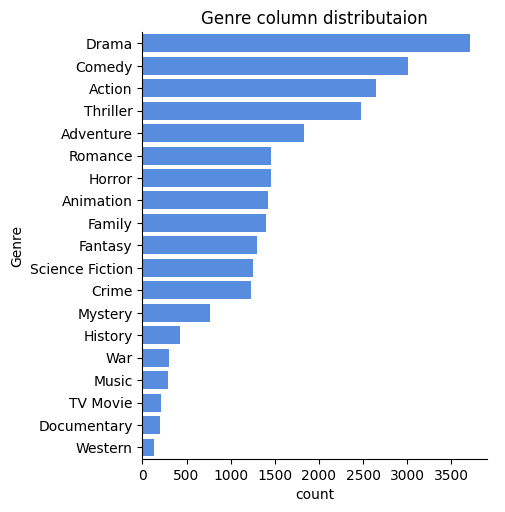

In [19]:
sns.catplot(y='Genre', data=df,kind='count',order=df['Genre'].value_counts().index, color='#4287f5')
plt.title("Genre column distributaion")
plt.show()

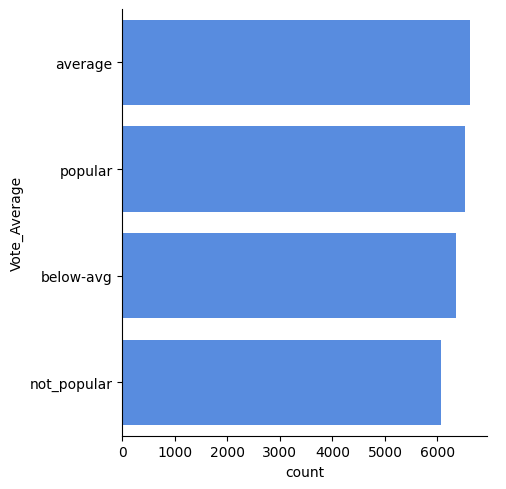

In [20]:
sns.catplot(y='Vote_Average', data=df, kind='count', order=df['Vote_Average'].value_counts().index,color='#4287f5')

In [21]:
df[df['Popularity']==df['Popularity'].max()]

Release_Date                    Title  Popularity  Vote_Count Vote_Average  \
0          2021  Spider-Man: No Way Home    5083.954        8940      popular   
1          2021  Spider-Man: No Way Home    5083.954        8940      popular   
2          2021  Spider-Man: No Way Home    5083.954        8940      popular   

             Genre  
0           Action  
1        Adventure  
2  Science Fiction

In [23]:
df[df['Popularity']==df['Popularity'].min()]

Release_Date                                 Title  Popularity  \
25546          2021  The United States vs. Billie Holiday      13.354   
25547          2021  The United States vs. Billie Holiday      13.354   
25548          2021  The United States vs. Billie Holiday      13.354   
25549          1984                               Threads      13.354   
25550          1984                               Threads      13.354   
25551          1984                               Threads      13.354   

       Vote_Count Vote_Average            Genre  
25546         152      average            Music  
25547         152      average            Drama  
25548         152      average          History  
25549         186      popular              War  
25550         186      popular            Drama  
25551         186      popular  Science Fiction

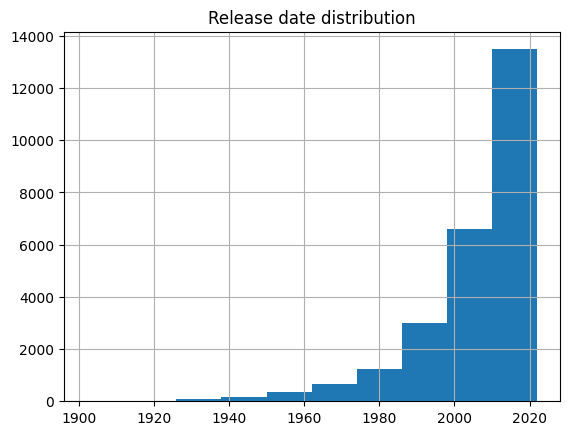

In [22]:
df['Release_Date'].hist()
plt.title("Release date distribution")
plt.show()